# Train_Model_Task_Model_Tuning


 * ` Trains a classifier to predict negative, neutral, positive based only on the input city.
    * Train a classifier that uses closest cities as features.
    * Dump the fitted model to the output file.



In [217]:
import sys
from IPython.display import clear_output
clear_output(wait=True)
import pandas as pd
import numpy as np
from modules.helpers import read_in_dataset
import inspect
from sklearn.metrics.pairwise import euclidean_distances
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier

print(inspect.getsource(read_in_dataset))

def read_in_dataset(dset, verbose=False):
    
    """Read in one of the datasets (train or properties)
        
        Keyword arguments:
        dset -- a string
        verbose -- whether or not to print info about the dataset
        
        Returns:
        a pandas dataframe
        """
    
    df =  pd.read_csv('{0}.csv'.format(dset), encoding = "ISO-8859-1")
    
    if verbose:
        print('\n{0:*^80}'.format(' Reading in the {0} dataset '.format(dset)))
        print("\nit has {0} rows and {1} columns".format(*df.shape))
        print('\n{0:*^80}\n'.format(' It has the following columns '))
        print(df.columns)
        print('\n{0:*^80}\n'.format(' The first 5 rows look like this '))
        print(df.head())
    
    return df



In [218]:
training_data_df= read_in_dataset('training_data', verbose = True)



********************* Reading in the training_data dataset *********************

it has 855 rows and 22 columns

************************* It has the following columns *************************

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone',
       'closest_cities', 'sentiment'],
      dtype='object')

*********************** The first 5 rows look like this ************************

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  681448197    False   finalized                   3      2/25/15 2:26   
1  681448213    False   finalized                   3      2/25/15 9:04   
2  681448214    False   finalized      

# Determine X and Y and the training set
-  The "y" variable will be the multi-class sentiment (0, 1, 2 for negative, neutral and positive respectively).
- * The "X" variables will be the closest city to the "tweet_coord" using Euclidean distance.

In [219]:
X = training_data_df.closest_cities
y = training_data_df.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
X_train.shape

(684,)

In [221]:
y_train.shape

(684,)

###  Visualize the classes and their ditribution at the target variable

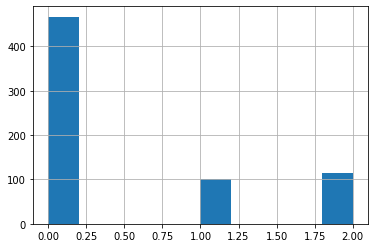

In [222]:
y_train.hist()  # we have an imbalanced dataset

In [223]:
y_train.value_counts() # 467 negative sentiments, 115 neutral and 102 positive

0.0    467
2.0    115
1.0    102
Name: sentiment, dtype: int64

# Handling categorical features
- one-hot encoding the names of the closest cities
- Another way is using LabelBinarizer to apply both transformation: from text to integer categories, then from integer categories  to one-hot vectors

In [224]:
# how many unique cities do we have
len(X_train.unique())

253

- one hot encoders

In [225]:
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(np.array(X_train).reshape(-1,1))
X_train_ohe_dense = X_train_ohe.toarray()



In [226]:
X_train_ohe_dense.shape

(684, 253)

- Label binarizer

In [227]:
encoder = LabelBinarizer()
X_train_lb = encoder.fit_transform(X_train)
X_train_lb.shape # dense matrix with shape (684, 253)

(684, 253)

# Defining Success Metrics for Computing the Scores
- this is a multiclass classification problem (0,1,2) classes
- the classes are imbalanced therefore accuracy is not approapriate to be used as a metric in this problem
- We will use various classification algorithms  and will evaluate them
- Will use recall-macro that is appropriate metric for multiclass classification

# Parameter Tuning and Model Selection

### Stochastic Gradient Descent  Classifier- linear model

In [228]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
sgd_clf = SGDClassifier()

    

### Fit the model

In [229]:
sgd_clf.fit(X_train_lb, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Predict the target 

In [230]:
X_test_lb = encoder.transform(X_test)
X_test_lb.shape

(171, 253)

In [231]:
y_pred = sgd_clf.predict(X_test_lb)
y_pred

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 2., 2., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1.,
       0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0.])

# Confusion Matrix- Error Analysis

In [232]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix

In [233]:
y_train_pred = cross_val_predict(sgd_clf, X_train_lb, y_train, cv=3)
conf_mx = confusion_matrix (y_train, y_train_pred)
conf_mx

array([[433,  18,  16],
       [ 90,   7,   5],
       [102,  10,   3]])

In [235]:
cross_val_score(sgd_clf, X_train_lb, y_train, cv=3, scoring = 'recall_macro')

array([0.32088989, 0.36105819, 0.34562735])

### Improve the performance 
- oversampling with SMOTE

In [236]:
smote=SMOTE('minority')
X_sm, Y_sm = smote.fit_sample(X_train_lb, y_train)

In [237]:
sgd_clf.fit(X_sm, Y_sm)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [238]:
cross_val_score(sgd_clf, X_sm, Y_sm, cv=3, scoring = 'recall_macro')

array([0.42735043, 0.51518219, 0.5401245 ])

### SVM for multiclass classification- OneVsResClassifier

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

clf_SVM = OneVsRestClassifier(LinearSVC())
params = {
      'estimator__C': [0.5, 1.0, 1.5],
      'estimator__tol': [1e-3, 1e-4, 1e-5],
      }
grid = GridSearchCV(clf_SVM, params, cv=5, scoring='f1_weighted')
grid.fit(X_sm, Y_sm)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=OneVsRestClassifier(estimator=LinearSVC(C=1.0,
                                                               class_weight=None,
                                                               dual=True,
                                                               fit_intercept=True,
                                                               intercept_scaling=1,
                                                               loss='squared_hinge',
                                                               max_iter=1000,
                                                               multi_class='ovr',
                                                               penalty='l2',
                                                               random_state=None,
                                                               tol=0.0001,
                                                               verbose=0),
 

In [44]:
y_pred_grid = grid.predict(X_test_lb)

In [45]:
from sklearn.metrics import precision_recall_fscore_support as score

def scores(y_test, y_pred):
    
    precision, recall, fscore, support = score(y_test, y_pred)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))

In [46]:
scores(y_test, y_pred_grid)

precision: [0.71       0.27692308 0.5       ]
recall: [0.66981132 0.6        0.08571429]
fscore: [0.68932039 0.37894737 0.14634146]
support: [106  30  35]


# Random Forest for multiclass classification problem

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=20)
param_grid = {"max_depth": [3, 15],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search_forest = GridSearchCV(forest_clf, param_grid=param_grid, cv=5, iid=False)
grid_search_forest.fit(X_sm, Y_sm)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=Fal

In [48]:
y_pred_grid_forest = grid_search_forest.predict(X_test_lb)
scores(y_test, y_pred_grid_forest)

precision: [0.73529412 0.23300971 0.        ]
recall: [0.47169811 0.8        0.        ]
fscore: [0.57471264 0.36090226 0.        ]
support: [106  30  35]


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model Selection
- Create model container and add models to it

In [124]:
#create model container
from modules.model_container import ept
models = ModelContainer()

#create models -- hyperparameter tuning already done by hand for each model
models.add_model(SGDClassifier())
models.add_model(GridSearchCV(forest_clf, param_grid=param_grid, cv=5, iid=False))
models.add_model(GridSearchCV(clf_SVM, params, cv=5, scoring='f1_weighted'))


- Cross validate models, then select, fit, and score test data with best model

In [126]:
num_procs = 4
models.cross_validate(training_data_df, k=2, num_procs=num_procs)
models.select_best_model()
models.best_model_fit(X_sm, Y_sm)
models.best_model_predict(X_test_lb)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
OneVsRestClassifier(estimator=LinearSVC(C=1, class_weight=None, dual=True,
                  

- Summarize results

In [128]:
models.print_summary()


Model Summaries:


 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) - MSE: 0.5014816665580396

 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) - MSE: 0.459001259430444

 OneVsRestClassifi

  -Conclusion: The best model based on recall_macro is SGD classifier 0.5099
  - however based on the requirement the at the Luigi framework it is asked that the score.csv file should be compled with the probabilites of the that classifier assigns to the classes
  - therefore I decided to use the Logistic Regression. Logistic regression is used for binary classifier, due tot the fact that the we have multiclass classification problem the right algorithm to use it Softmax Regression
  or Multinomial Logistic Regression

# Compute Probabilities with  Softmax Logistic regression

In [205]:
from sklearn.linear_model import LogisticRegression
softmax_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_clf.fit(X_sm, Y_sm)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
probabilities = softmax_clf.predict_proba(X_test_lb)


# Evaluate the Softmax Regression

In [242]:
recall_macro = cross_val_score(softmax_clf, X_sm, Y_sm, cv=3, n_jobs=4, scoring='recall_macro')
mean_recall_macro = np.mean(recall_macro)
mean_recall_macro

0.49901203933461996

# Finalize the model

In [208]:
import pickle
filename = 'model.pkl'
pickle.dump(lg_clf, open(filename, 'wb'))